# Cancer Data Analysis

## Importing Required Libraries

In [1]:
import pandas as pd # for Data Frame
import numpy as np # for Mathemetical Operations
import matplotlib.pyplot as plt # for Visulization
%matplotlib inline
import seaborn as sns # for Visulization
import warnings
warnings.filterwarnings('ignore')

## Part - 1 : Data Exploration and Pre-processing

### 1) Load the given dataset

In [46]:
df = pd.read_csv('Project_10_Cancer_Data_Analysis.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 2) Find shape of Dataset

In [47]:
df.shape

(569, 32)

### 3) Show basic information of data

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [49]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### 4) Check null values

In [50]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### 5) Drop id column

In [51]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [52]:
df = df.drop('id', axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 6) Show values counts in diagnosis column

<AxesSubplot:>

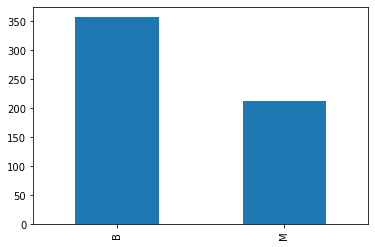

In [53]:
df['diagnosis'].value_counts().plot(kind = 'bar')

### 7) Create a pair plot between two column radius_mean and texture_mean by diagnosis

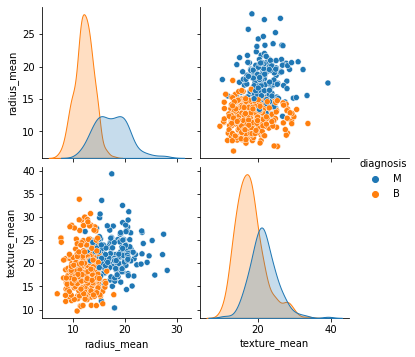

In [54]:
sns.pairplot(df.loc[:,['radius_mean', 'texture_mean', 'diagnosis']], hue='diagnosis', data = df)

### 8) Select only two feature radius_mean & texture_mean for clustering in new dataset

In [55]:
new_data = df[['radius_mean', 'texture_mean']]
new_data.head()

,radius_mean,texture_mean
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34


### 10) Apply Scaling on new data

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scale = StandardScaler()

In [58]:
data = scale.fit_transform(new_data)

In [59]:
data = pd.DataFrame(data, columns=['radius_mean', 'texture_mean'])
data.head()

,radius_mean,texture_mean
0,1.097064,-2.073335
1,1.829821,-0.353632
2,1.579888,0.456187
3,-0.768909,0.253732
4,1.750297,-1.151816


## Part - 2 : Working with Model

### 1) Display hierarchical clustering as a dendogram using scipy

In [60]:
from scipy.cluster.hierarchy import linkage, dendrogram

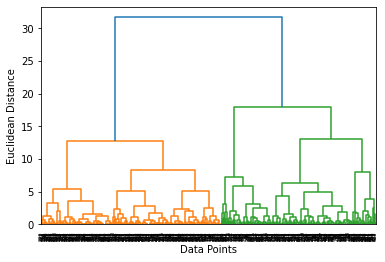

In [61]:
merg = linkage(data, method='ward')

dendrogram(merg, leaf_rotation=90)
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

### 2) Apply Agglomerative Clustering on dataset with 2 n number of cluster

In [62]:
from sklearn.cluster import AgglomerativeClustering

In [63]:
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster = hc.fit_predict(data)

In [64]:
data['label'] = cluster

In [65]:
data.head()

,radius_mean,texture_mean,label
0,1.097064,-2.073335,1
1,1.829821,-0.353632,0
2,1.579888,0.456187,0
3,-0.768909,0.253732,1
4,1.750297,-1.151816,0


### 3) Check count of label

In [67]:
data.label.value_counts()

1    306
0    263
Name: label, dtype: int64

### 4) Plot the label data

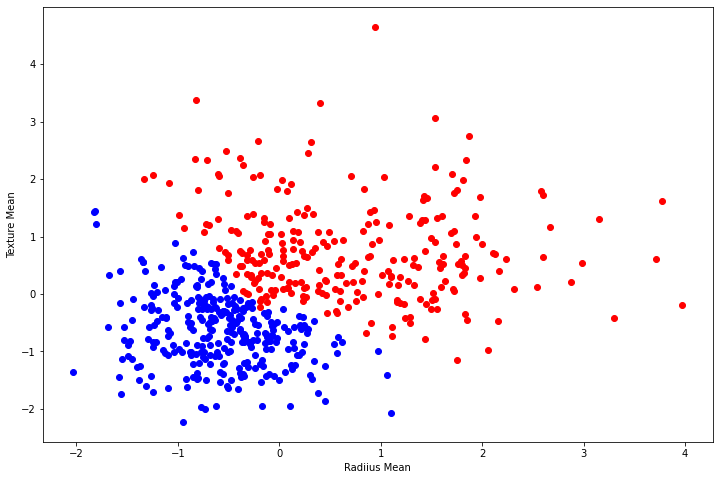

In [69]:
plt.figure(figsize=(12, 8))
plt.scatter(data['radius_mean'][data.label == 0], data['texture_mean'][data.label == 0], color = 'red')
plt.scatter(data['radius_mean'][data.label == 1], data['texture_mean'][data.label == 1], color = 'blue')

plt.xlabel('Radiius Mean')
plt.ylabel('Texture Mean')
plt.show()

### 5) Check the silhouette score

In [70]:
from sklearn.metrics import silhouette_score

In [71]:
score = silhouette_score(data, cluster)
score

0.4717861439453535

### 6) Now apply KMean Clustering no dataset with 2 number of clusters

In [72]:
from sklearn.cluster import KMeans

In [73]:
new_data.head()

,radius_mean,texture_mean
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34


In [74]:
cls = KMeans(n_clusters=2)
cls.fit(new_data)

KMeans(n_clusters=2)

### 7) Check wcss score

In [75]:
wcss = cls.inertia_
wcss

9403.76824064772

### 9) Try different N number from 1 to 10 and plot the result of wcss score

In [76]:
wcss = []

for i in range(1, 11):
    cls = KMeans(n_clusters=i, random_state=40)
    cls.fit(new_data)
    
    wcss.append(cls.inertia_)

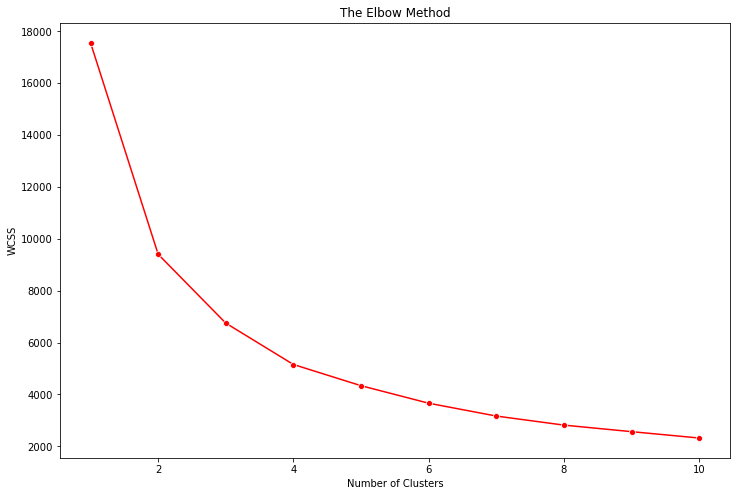

In [78]:
plt.figure(figsize=(12,8))

sns.lineplot(range(1,11), wcss, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### 10) Apply KMeans again with different no. of cluster according to best wcss score

In [79]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=50)
y_kmeans = kmeans.fit_predict(new_data)

### 11) Create column for label cluster

In [80]:
new_data['label'] = y_kmeans
new_data.head()

,radius_mean,texture_mean,label
0,17.99,10.38,3
1,20.57,17.77,2
2,19.69,21.25,2
3,11.42,20.38,0
4,20.29,14.34,2
